# Projet numérique : choix du pas de temps

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Pas fixe

### Schéma d'Euler explicite

Rappelons que le Schéma d'Euler explicite marche de la manière suivante :

Si la fonction y vérifie : y'=f(y) et y(t0)=x0 ,

Alors on peut construire la fonction point par point :  $x_{n+1} = x_n + f(t_n, x_n)*dt$

In [3]:
def solve_euler_explicit(f, x0, dt, tf, t0=0):
    x=[x0]
    t=[t0]
    n= int((tf-t0)/dt)
    for i in range(n):
        t.append(t0+i*dt)
        x.append(f(x[i])*dt + x[i])
    return t, x

On va tester le solveur sur l'équation triviale y'=y, avec y(t0)=1, qui doit donc avoir pour solution l'exponentielle.

In [4]:
def f(x):
    return x
X,Y = solve_euler_explicit(f, 1, 0.01, 3)

Y1 = [np.exp(i) for i in X]

Comparons la solution donnée par le solveur et la solution exponentielle.

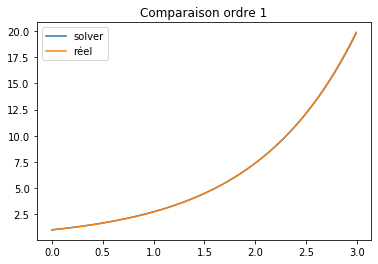

In [5]:
plt.plot(X,Y, label='solver')
plt.plot(X,Y1, label='réel')
plt.legend()
plt.title('Comparaison ordre 1')
plt.show()

Le solveur a réussi à donner une solution fidèle.

### Convergence à l'ordre 1

On peut montrer que le schéma d'Euler explicite est convergent d'ordre 1.

Rappelons que, pour cela, nous cherchons $c_{v}$>0 tel que : 
$$ \max_{1 \leq j \leq J} |x^j - x(t_j)| \leq c_v * dt $$

In [6]:
def max(f,g,x0,dt,tf,t0=0):
    m=0
    S=solve_euler_explicit(f,x0,dt,tf)
    for t,i in enumerate(S[0]):
        if abs(g(i)-S[1][t])>m:
            m=abs(g(i)-S[1][t])
    return m

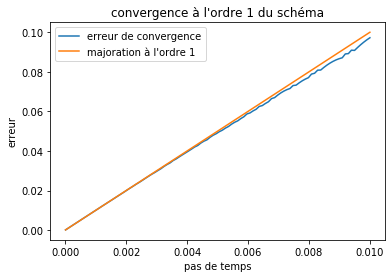

In [6]:
pas_de_t = np.linspace(10**-5, 0.01, 100)
erreur_de_conv = [max(f, np.exp, 1, i, 3) for i in pas_de_t]
y = [10*i for i in pas_de_t]

plt.plot(pas_de_t, erreur_de_conv, label = 'erreur de convergence')
plt.plot(pas_de_t, y, label = "majoration à l'ordre 1")

plt.xlabel('pas de temps')
plt.ylabel('erreur')
plt.title("convergence à l'ordre 1 du schéma")
plt.legend()
plt.show()

En prenant $c_{v}$=10, on arrive à majorer l'erreur maximale de manière linéaire en fonction de dt. Le schéma d'Euler explicite est donc convergent d'ordre (au moins) 1.

Cependant, si l'on voulait montrer la convergence à l'ordre 2...

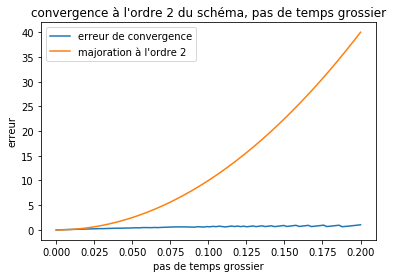

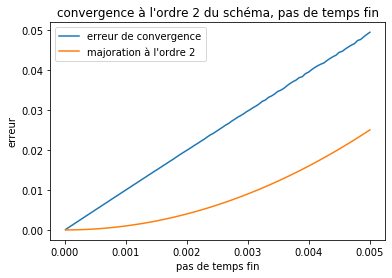

In [8]:
pas_de_t_grossier = np.linspace(10**-5, 0.2, 100)
erreur_de_conv = [max(f, np.exp, 1, i, 3) for i in pas_de_t_grossier]
y = [1000*i*i for i in pas_de_t_grossier]

plt.plot(pas_de_t_grossier, erreur_de_conv, label = 'erreur de convergence')
plt.plot(pas_de_t_grossier, y, label = "majoration à l'ordre 2")

plt.xlabel('pas de temps grossier')
plt.ylabel('erreur')
plt.title("convergence à l'ordre 2 du schéma, pas de temps grossier")
plt.legend()
plt.show()


pas_de_t_fin = np.linspace(10**-5, 0.0050, 100)
erreur_de_conv = [max(f, np.exp, 1, i, 3) for i in pas_de_t_fin]
y = [1000*i*i for i in pas_de_t_fin]

plt.plot(pas_de_t_fin, erreur_de_conv, label = 'erreur de convergence')
plt.plot(pas_de_t_fin, y, label = "majoration à l'ordre 2")

plt.xlabel('pas de temps fin')
plt.ylabel('erreur')
plt.title("convergence à l'ordre 2 du schéma, pas de temps fin")
plt.legend()
plt.show()



Sans être une quelconque preuve, on peut voir que un cv même assez grand ne convient pas pour majorer l'erreur aux pas de temps petits. On peut mettre en doute la convergence à l'ordre 2.

## Schéma de Heun 

On a pu voir en TD que Heun est un schéma convergent d'ordre 2 si la fonction f est C1.
Codons la méthode de Heun et essayons la sur l'équation différentielle précédente.

Rappelons que la méthode de Heun fonctionne avec :
$x_{j+1} = x_j + \frac{dt}{2} * (f(t_j, x_j) + f(t_{j+1}, x_j + dt*f(t_j, x_j)))$

In [9]:
def solver_heun(f, x0, dt, tf, t0 = 0):
    t = []
    k = t0
    while k < tf :
        t.append(k)
        k += dt
    t.append(tf)
    n = len(t)
    x =[x0]
    for i in range(n-1):
        h = t[i + 1] - t[i]
        p1 = f(t[i], x[i])
        p2 = f(t[i + 1], x[i] + (t[i+1] - t[i])*p1)
        x.append(x[i] + (t[i+1] - t[i])/2*(p1 + p2))
    return t, x

In [10]:
def f(t,x):
    return x

X,Y = solver_heun(f, 1, 0.1, 3)

Y1 = [np.exp(i) for i in X]

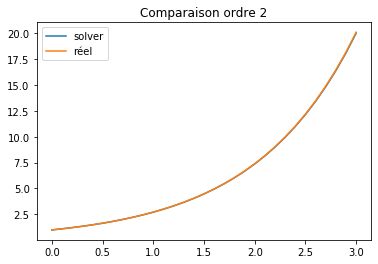

In [11]:
plt.plot(X,Y, label='solver')
plt.plot(X,Y1, label='réel')
plt.legend()
plt.title('Comparaison ordre 2')
plt.show()

## Convergence à l'ordre 2

On peut montrer que le schéma de Heun est convergent d'ordre 2 avec l'exemple utilisé précédemment. 
Commençons en modifiant la fonction max :

In [12]:
def max(f,g,x0,dt,tf,t0=0):
    m=0
    S=solver_heun(f,x0,dt,tf)
    for t,i in enumerate(S[0]):
        if abs(g(i)-S[1][t])>m:
            m=abs(g(i)-S[1][t])
    return m

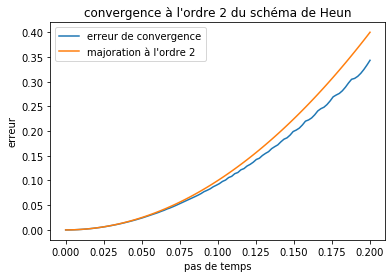

In [13]:
pas_de_t = np.linspace(10**-5, 0.2, 100)
erreur_de_conv = [max(f, np.exp, 1, i, 3) for i in pas_de_t]
y = [10*i*i for i in pas_de_t]

plt.plot(pas_de_t, erreur_de_conv, label = 'erreur de convergence')
plt.plot(pas_de_t, y, label = "majoration à l'ordre 2")

plt.xlabel('pas de temps')
plt.ylabel('erreur')
plt.title("convergence à l'ordre 2 du schéma de Heun")
plt.legend()
plt.show()

En prenant cv=10, on a bien une majoration quadratique de l'erreur maximale. Ainsi, la méthode de Heun est ici convergente d'ordre 2.













## Adaptation du pas de temps

### Comment estimer l'erreur comise ?

On va choisir comme condition initiale $$x^j = x(t_j)$$

On a $$e^{j+1} = x^j - x^{j+1} + \displaystyle \int_{t_j}^{t_{j+1}} f(s,x(s)) \, \mathrm{d}s$$

Or f(s,x(s)) est la dérivée de x en s, donc l'intégrale se simplifie :

$$\Rightarrow e^{j+1} = x^j - x^{j+1} + x(t_{j+1}) - x(t_j)$$
$$= x(t_{j+1}) - x^{j+1}$$
$$= x(t_{j} + dt_j) - (x^{j} + dt_{j}f(t_j,x^j))$$

Par un développement de Taylor à l'odre 2 en considérant dt_j petit :

$$= x(t_j) + dt_{j}f(t_j,x^j) + \frac{(dt_j)^2}{2}f'(t_j,x(t_j)) - x^j - dt_{j}f(t_j,x^j)$$
$$= \frac{(dt_j)^2}{2}f'(t_j,x(t_j))$$
$$= \frac{(dt_j)^2}{2}\frac{f(t_{j+1},x(t_{j+1}))-f(t_j,x(t_j))}{dt_j}$$

Or $$f(t_{j+1},x(t_{j+1})) = f(t_{j+1},x(t_j) + dt_{j}f(t_j,x^j) + O(dt^2))$$
$$= f(t_{j+1},x^{j+1} + O(dt^2))$$
$$= f(t_{j+1},x^{j+1}) + \partial_{x}f(t_{j+1},x^{j+1})O(dt^2)$$

Puis f étant $C^{1}$, $$\partial_{x}f(t_{j+1},x^{j+1})$$ est bornée sur un segment et est donc un O(1)

Donc $$e^{j+1} = dt_j\frac{f(t_{j+1},x^{j+1})-f(t_j,x^j)}{2} + O(dt^3)$$

Et on passe ensuite à la norme pour avoir le résultat souhaité

### Comment choisir $\bigtriangleup t_{new}$ ?

Montrons le second résultat demandé.

Commencons par montrer que $||e^{j+1}|| = O(\Delta t^2)$ .

En utilisant $f(t_{j+1}, x^{j+1}) - f(t_j, x^j) = \Delta t \frac{d}{dt}f(t_j, x^j) + o(\Delta t)= O(\Delta t)$

Il vient $||e^{j+1}|| = \frac{\Delta t}{2}  ||(f(t_{j+1}, x^{j+1}) - f(t_j, x^j))|| + o(\Delta t^2) = O(\Delta t^2)$

On peut en déduire une expression possible pour le pas de temps.

Il s'agit d'estimer le pas de temps pour chaque point $x_j$ afin de majorer l'erreur.

D'après les résultats précédents, $e^{j+1}$ varie en $\Delta t^2$ ($e^{j+1} = k_1 * \Delta t^2$), en première approximation à l'ordre 2.

Donc on a $\Delta t = k*(e^{j+1})^\frac{1}{2}$
    
La méthode doit avoir pour tolérance $Tol_{abs}$ sur l'erreur. On peut donc prendre 
<center>$\Delta t_{new} = k*(Tol_{abs})^\frac{1}{2}$
    
<center>D'où : $\frac{\Delta t_{new}}{\Delta t} = (\frac{Tol_{abs}}{e^{j+1}})^\frac{1}{2}$
    
Ainsi  $\Delta t_{new} = \Delta t (\frac{Tol_{abs}}{e^{j+1}})^\frac{1}{2}$

### Comment coder la méthode d'Euler à pas variable ?

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib; 
from matplotlib.pyplot import *
import seaborn as sns
sns.set()
%matplotlib notebook

Etudions le code suivant :

In [15]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

Quel en est l'intérêt par rapport au schéma d'Euler explicite à pas fixe ?
Comparons les résultats des deux algorithmes sur un même problème...

<IPython.core.display.Javascript object>


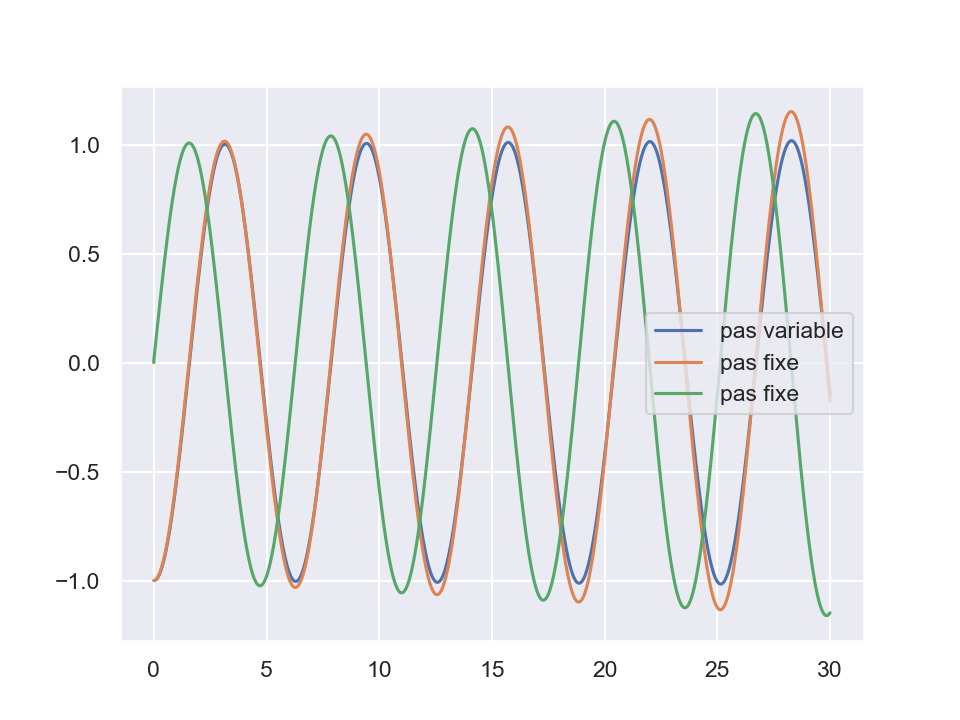

In [17]:
omega = 1

def f(xy):
    x, y = xy
    return array([y, -omega*x])

t0, tf, x0 = 0.01, 30.0, array([-1.0, 0.0])

t, x = solve_ivp_euler_explicit_variable_step(f, t0, x0, tf)
plot(t,x[0],label="pas variable")

t, x1 = solve_euler_explicit(f,x0,t0,tf)
plot(t,x1,label='pas fixe')

legend()
show()

On peut donc constater que le schéma d'Euler à pas fixe diverge, ce qui ne devrait pas être le cas.
Tandis que le schéma d'Euler à pas variable converge bien.

Cela est directement lié au fait que le pas de temps est idéalement choisi par le schéma d'Euler à pas variable. Il a été fixé par l'utilisateur dans le cas du schéma à pas fixe, et est donc possiblement mal choisi.

L'initialisation du pas se fait à une valeur relativement grande (dtmax/10)
La boucle principale sert à enregistrer les points à tracer dans les listes ts, xs, qui doivent être temporellement espacés d'un intervalle de temps **dtmax**, jusqu'à atteindre **t_f**.

Dans la boucle secondaire, il faut créer autant de points intermédiaires que nécessaires avant le prochain que l'on sauvegardera. Le dernier pas conservé dans la boucle principale permet de calculer le premier point intermédiaire, et ainsi de suite. Les formules déterminées précedemment permettent de choisir le pas adapté.

D'après les réflexions préliminaires, il s'agit d'abord d'estimer l'erreur locale, censée être la différence entre la vraie solution au temps $t_{j+1}$ ( si elle était initialisée à $x_{j}$ au temps $t_{j}$ ) et la solution $x_{j+1}$ trouvée par l'algorithme.

On utilise donc le résultat :
$\| e^{j+1}\|= \bigtriangleup t \frac{\| f(t_{j+1},x_{j+1} - f(t_{j},x_{j}) \|}{2} + O(\bigtriangleup t_{j}^3$)

Pour cela on calcule $\frac{\| f(t_{j+1},x_{j+1} - f(t_{j},x_{j}) \|}{2}$
grâce à 

Puisque
$$ x_{back} = x_{next} - dt.f(x_{next}) = x + dt(f(x) - f(x_{next})) $$
Donc $$ x_{back} - x = f(x) - f(x_{next}) = f(t_{j+1}, x^{j+1}) - f(t_j, x^j) $$

On peut donc ré écrire le résultat utilisé sous la forme $$\|e^{j+1}\| = \frac {\|x_{back} - x\|}{2} + O(\Delta t_j^3) $$ 

Et on achève le calcul du potentiel $\bigtriangleup t_{new}$ avec

Ainsi la dernière ligne de code ci-dessus calcule bien le nouveau pas de temps, en prenant un facteur 0,9 de sécurité pour respecter la tolérance.


Si le pas est trop faible (dt < dtmin), on renvoie une erreur :

S'il est trop élevé (dt > dtmax/2) on prend dtmax/2 pour s'assurer d'avoir au moins un point intermédiaire avant la sauvegarde du prochain point :

Ensuite on peut avancer au temps suivant :

L'opération est réitérée jusqu'à atteindre un temps **dtmax** depuis le dernier point sauvegardé.

Enfin, quand la boucle secondaire est terminée, on a potentiellement dépassé (de peu) dtmax.

Il faut appliquer le schéma d'Euler à nouveau (en prenant un pas négatif) pour revenir un peu en arrière sur l'échelle des temps.

Une fois cela fait, la boucle peut recommencer en réinitialisant ti à 0, et en sauvegardant le point obtenu. Il ne reste plus qu'à décaler les origines de temps et de x pour permettre le bon fonctionnement de la boucle. Tout cela se fait dans lignes de codes suivantes :

L'algorithme est compris, il ne reste plus qu'à le faire fonctionner. Il serait cependant intéressant d'en étudier les limites et l'intérêt d'utiliser un schéma d'Euler symplectique, notamment pour garder la propriété de conservation de l'énergie de certains systèmes.